In [1]:
import cv2
import os
import glob
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from skimage import exposure
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
dataAugment = True
if(dataAugment): from keras.preprocessing.image import ImageDataGenerator
    
augRatio = 3  #Data augmentation時，要產生幾倍數量的dataset
testimg = "dataset/train/Small-flowered Cranesbill/1f14ed265.png"
ratioVal = 0.2  #要從train dataset取出多少比例的資料作為validate dataset
reSize=(360,360)  #訓練前圖片要縮放的尺寸
epochs = 100  #要跑幾個世代
batch_size = 128   #每批次提取多少數量的圖片進行訓練
trainDataset = "dataset/train"  #Train dataset的路徑
testDataset = "dataset/test"   #Test dataset的路徑
#Lable的對應, 每個Lable對應到一個數值
dict_labels = {"Black-grass": 0,"Charlock": 1, "Cleavers": 2, "Common Chickweed": 3, "Common wheat": 4, "Fat Hen": 5,
              "Loose Silky-bent": 6, "Maize": 7, "Scentless Mayweed": 8, "Shepherds Purse": 9, "Small-flowered Cranesbill": 10, 
              "Sugar beet": 11 }

#存放dataset及Label使用
images = []
labels = []
labels_hot = []
testImages = []
testImagesName = []

In [3]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

In [4]:
def load_image(folder):    
    global images, labels, labels_hot, dict_labels
    
    for filename in os.listdir(folder):
        label = os.path.basename(folders)
        className = np.asarray( label )        
        if label is not None:
            labels.append(className)
            labels_hot.append(dict_labels[label])
            #np.append(labels, className , axis=0)
            #np.append(labels_hot, np.array(dict_labels[label]), axis=0)
            
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = extractPlantsArea(img)
            img = cv2.resize(img,reSize,interpolation=cv2.INTER_CUBIC)            
            images.append(np.array(img))

In [5]:
def extractPlantsArea(orgimg):
    img = cv2.cvtColor(orgimg, cv2.COLOR_BGR2HSV)
    lower_color = np.array([25, 40, 40]) 
    upper_color = np.array([100, 225, 225]) 
    plants = cv2.inRange(img, lower_color , upper_color)
            
    clone = plants.copy()    
    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          
    mask = np.zeros(orgimg.shape[:2], dtype="uint8")
    
    for c in cnts:
        cv2.drawContours(mask, [c], -1, 255, -1)

    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)
    
    image_blur = cv2.bilateralFilter(image,3,255,255) 
    #image_blur = cv2.GaussianBlur(image, (0, 0), 3)
    img = cv2.addWeighted(image, 1.5, image_blur, -0.5, 0)
    
    return img

In [352]:
''' Change the order 
def extractPlantsArea(orgimg):
    img = cv2.bilateralFilter(orgimg,3,255,255)     
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_color = np.array([25, 40, 40]) 
    upper_color = np.array([100, 225, 225]) 
    plants = cv2.inRange(img, lower_color , upper_color)
            
    clone = plants.copy()    
    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          
    mask = np.zeros(orgimg.shape[:2], dtype="uint8")
    
    for c in cnts:
        cv2.drawContours(mask, [c], -1, 255, -1)

    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)
    return image
'''    

' Change the order \ndef extractPlantsArea(orgimg):\n    img = cv2.bilateralFilter(orgimg,3,255,255)     \n    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)\n    lower_color = np.array([25, 40, 40]) \n    upper_color = np.array([100, 225, 225]) \n    plants = cv2.inRange(img, lower_color , upper_color)\n            \n    clone = plants.copy()    \n    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          \n    mask = np.zeros(orgimg.shape[:2], dtype="uint8")\n    \n    for c in cnts:\n        cv2.drawContours(mask, [c], -1, 255, -1)\n\n    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)\n    return image\n'

In [6]:
print("Load images from Train dataset")
for folders in glob.glob(trainDataset+"/*"):
    print("Load {} ...".format(folders))
    load_image(folders)
    
print("Load images from Test dataset")    
for filename in os.listdir(testDataset):
    img = cv2.imread(testDataset+"/"+filename)
    
    if img is not None:
        img = extractPlantsArea(img)
        img = cv2.resize(img,reSize,interpolation=cv2.INTER_CUBIC)
        
        testImages.append(np.array(img))
        testImagesName.append(filename)

Load images from Train dataset
Load dataset/train/Common Chickweed ...
Load dataset/train/Scentless Mayweed ...
Load dataset/train/Maize ...
Load dataset/train/Charlock ...
Load dataset/train/Loose Silky-bent ...
Load dataset/train/Common wheat ...
Load dataset/train/Cleavers ...
Load dataset/train/Sugar beet ...
Load dataset/train/Small-flowered Cranesbill ...
Load dataset/train/Fat Hen ...
Load dataset/train/Shepherds Purse ...
Load dataset/train/Black-grass ...
Load images from Test dataset


In [7]:
images = np.array(images) 
labels_hot = np.array(labels_hot)
testImages = np.array(testImages) 
print("images.shape={} , labels_hot.shape=={}".format(images.shape, labels_hot.shape))
print(labels_hot)

images.shape=(4750, 360, 360, 3) , labels_hot.shape==(4750,)
[3 3 3 ..., 0 0 0]


Label:Scentless Mayweed , ID:8, shape:(360, 360, 3)


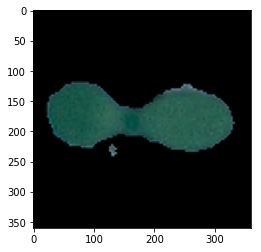

In [8]:
sampleID = 868
#print(images[3])
plt.imshow(images[sampleID])
print("Label:{} , ID:{}, shape:{}".format(labels[sampleID], labels_hot[sampleID], images[sampleID].shape))

In [9]:
if(dataAugment):
    (trainData, valiData, trainLabels, valiLabels) = train_test_split(images, labels_hot, test_size=ratioVal, random_state=42)

In [10]:
print("trainData records: {}".format(len(trainData)))
print("trainData.shape={} trainLabels.shape={}".format(trainData.shape, trainLabels.shape))

if(dataAugment):
    print("valiData records: {}".format(len(valiData)))
    print("valiData.shape={} valiLabels.shape={}".format(valiData.shape, valiLabels.shape))

trainData records: 3800
trainData.shape=(3800, 360, 360, 3) trainLabels.shape=(3800,)
valiData records: 950
valiData.shape=(950, 360, 360, 3) valiLabels.shape=(950,)


In [11]:
trainLabels_hot = np_utils.to_categorical(trainLabels)
print("Train dataset: ", trainLabels_hot.shape)

if(dataAugment):
    valiLabels_hot = np_utils.to_categorical(valiLabels)
    print("Validate dataset:", valiLabels_hot.shape)

Train dataset:  (3800, 12)
Validate dataset: (950, 12)


In [12]:

trainData_normalize = trainData.astype('float32') / 255.0

if(dataAugment):
    valiData_normalize = valiData.astype('float32') / 255.0
    
testImages_normalize = testImages.astype('float32') / 255.0


In [13]:
if(dataAugment):
    train_datagen = ImageDataGenerator(
        zoom_range = 0.15,
        shear_range=0.5,
        rotation_range = 60)
    
    valdi_datagen =  ImageDataGenerator(
        zoom_range = 0.15,
        shear_range=0.5,
        rotation_range = 60)
    
    train_generator = train_datagen.flow(trainData_normalize, trainLabels_hot, batch_size=batch_size)
    valdi_generator = valdi_datagen.flow(valiData_normalize, valiLabels_hot, batch_size=batch_size)    

# Models

In [98]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization

In [99]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', input_shape=(reSize[0], reSize[1], 3)))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
#model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
#model.add(BatchNormalization())
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(1024))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.5))
model.add(Dense(len(dict_labels), activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
p_re_lu_13 (PReLU)           (None, 128, 128, 32)      524288    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
p_re_lu_14 (PReLU)           (None, 64, 64, 64)        262144    
_________________________________________________________________
dropout_18 (Dropout)         (None, 64, 64, 64)        0         
__________

In [39]:
'''
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Input

img_input = Input(shape=(reSize[0], reSize[1], 3))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
 
# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
 
# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
 
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
 
# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
 
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
#x = Dense(12, activation='softmax', name='predictions')(x)
predictions = Dense(12, activation='softmax')(x)

model = Model(inputs=img_input, outputs=predictions)
model.summary()
'''

"\nfrom keras.optimizers import SGD\nfrom keras.models import Model\nfrom keras.layers import Input\n\nimg_input = Input(shape=(reSize[0], reSize[1], 3))\n# Block 1\nx = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)\nx = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)\nx = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)\n \n# Block 2\nx = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)\nx = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)\nx = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)\n \n# Block 3\nx = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)\nx = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)\nx = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)\nx = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)\n \n# Block 4\nx =

In [51]:
'''
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

base_model = VGG16(weights=None, include_top=True, input_shape=trainData_normalize.shape[1:], classes=12)
base_model.compile(optimizer=SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])   
base_model.fit(trainData_normalize, trainLabels_hot, nb_epoch=10, batch_size=256, verbose=1)
base_model.evaluate(valiData_normalize, valiLabels_hot, batch_size=256, verbose=1)
'''

#model = Model(inputs=img_input, outputs=predictions)
#model.compile(optimizer='rmsprop',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])
#model.fit(trainData_normalize, trainLabels_hot)  # starts training




#from keras import optimizers
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#from keras.optimizers import Adam
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

#sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

"\nfrom keras.applications.vgg16 import VGG16\nfrom keras.preprocessing import image\nfrom keras.applications.vgg16 import preprocess_input\nfrom keras.models import Model\n\nbase_model = VGG16(weights=None, include_top=True, input_shape=trainData_normalize.shape[1:], classes=12)\nbase_model.compile(optimizer=SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])   \nbase_model.fit(trainData_normalize, trainLabels_hot, nb_epoch=10, batch_size=256, verbose=1)\nbase_model.evaluate(valiData_normalize, valiLabels_hot, batch_size=256, verbose=1)\n"

In [100]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]


In [101]:
steps_per_epoch=int((len(trainData_normalize)*augRatio)/batch_size)
validation_steps = int((len(valiData_normalize)*augRatio)/batch_size)

print("batch_size={}".format(batch_size))
print("trainLabels_hot.shape={}".format(trainLabels_hot.shape))
print("steps_per_epoch={}".format(steps_per_epoch))

batch_size=128
trainLabels_hot.shape=(3800, 12)
steps_per_epoch=89


In [102]:
#from keras.optimizers import SGD
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

#sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#ADAM = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#model.compile(loss='categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1e-4, momentum=0.9),
#              metrics=['accuracy'])

if(dataAugment):
    train_history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valdi_generator, validation_steps=validation_steps, callbacks=callbacks_list)
    #train_history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
    #                validation_data=valdi_generator, validation_steps=validation_steps)
    
else:    
    train_history = model.fit(x=trainData_normalize, y=trainLabels_hot, validation_split=ratioVal, 
                              epochs=epochs, batch_size=batch_size, verbose=1, callbacks=callbacks_list)

Epoch 1/100
89/89 [==============================] - 478s - loss: 0.2224 - acc: 0.9234 - val_loss: 0.1925 - val_acc: 0.9242
Epoch 2/100
89/89 [==============================] - 475s - loss: 0.1537 - acc: 0.9407 - val_loss: 0.1659 - val_acc: 0.9293
Epoch 3/100
89/89 [==============================] - 475s - loss: 0.1337 - acc: 0.9483 - val_loss: 0.1583 - val_acc: 0.9364
Epoch 4/100
89/89 [==============================] - 475s - loss: 0.1163 - acc: 0.9554 - val_loss: 0.1519 - val_acc: 0.9395
Epoch 5/100
89/89 [==============================] - 475s - loss: 0.1129 - acc: 0.9563 - val_loss: 0.1279 - val_acc: 0.9501
Epoch 6/100
89/89 [==============================] - 475s - loss: 0.0988 - acc: 0.9619 - val_loss: 0.1257 - val_acc: 0.9500
Epoch 7/100
89/89 [==============================] - 476s - loss: 0.0915 - acc: 0.9641 - val_loss: 0.1301 - val_acc: 0.9495
Epoch 8/100
89/89 [==============================] - 475s - loss: 0.0831 - acc: 0.9675 - val_loss: 0.1049 - val_acc: 0.9609
Epoch 9/

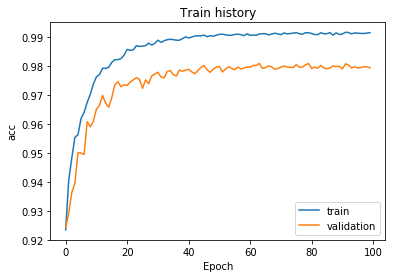

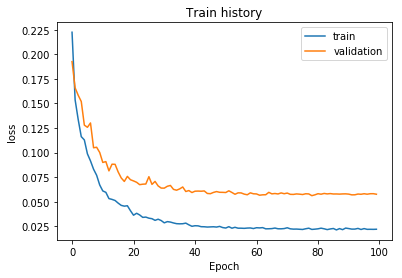

In [103]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

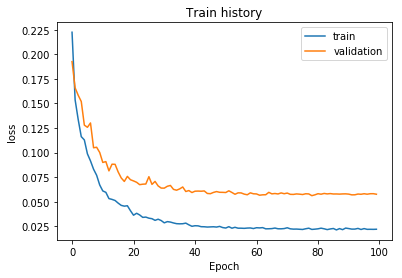

In [104]:
show_train_history(train_history, 'loss', 'val_loss')

In [105]:
Y_pred = model.predict(testImages_normalize)

In [106]:
import pandas as pd 
inv_dict_labels = {v: k for k, v in dict_labels.items()}

results = np.argmax(Y_pred,axis = 1)
testFiles = []
testPredict = []
i=0
for filename in os.listdir(testDataset):
    #print("{}) {}".format(i, results[i]))
    testFiles.append(filename)
    testPredict.append(inv_dict_labels[results[i]])
    print("{},{}".format(filename, inv_dict_labels[results[i]]))
    i += 1

submission = pd.DataFrame({
        "file": testFiles,
        "species": testPredict
    })
submission.to_csv('Plant-submission.csv', index=False)

df7cb5f87.png,Fat Hen
d689256be.png,Cleavers
ef65533d5.png,Black-grass
862b8e7a0.png,Sugar beet
d84d37a61.png,Common Chickweed
9b9911f20.png,Scentless Mayweed
8a8d6c712.png,Cleavers
c832e4302.png,Fat Hen
851c90831.png,Black-grass
085974290.png,Scentless Mayweed
721b2c47a.png,Fat Hen
089ad62a7.png,Common Chickweed
96ecad7a1.png,Small-flowered Cranesbill
1b490196c.png,Shepherds Purse
aad8375e0.png,Charlock
969a851be.png,Scentless Mayweed
4c7838de4.png,Common wheat
f6d250856.png,Common Chickweed
da4ed3a28.png,Charlock
35cf9fa01.png,Shepherds Purse
0dba99002.png,Sugar beet
a800caead.png,Sugar beet
615d2b0a9.png,Sugar beet
c1ecff98b.png,Loose Silky-bent
6edb96d45.png,Cleavers
16467a950.png,Loose Silky-bent
e4a76885b.png,Maize
5af1d74ee.png,Sugar beet
98da6ef4e.png,Scentless Mayweed
3da774107.png,Fat Hen
a1da8be3c.png,Maize
4b032563b.png,Common Chickweed
be2499cf4.png,Loose Silky-bent
606647f64.png,Common Chickweed
b29339405.png,Loose Silky-bent
dfb1d9012.png,Loose Silky-bent
34dd57ca9.png,L